#C23-PC669 Capstone Project
## Bugiene
A Machine Learning Model implied computer vision using Convolutional Neural Network for classifying or predicting certain fruits into Rotten or Fresh categories.

## Mount to drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Required Library




In [25]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image

In [26]:
print(tf.__version__)

2.12.0


##Extract Dataset



In [27]:
data_zip = '/content/drive/MyDrive/dataset/bugienev2.zip'
ref_zip = zipfile.ZipFile(data_zip, 'r')
ref_zip.extractall('/tmp')

ref_zip.close()

## Function for Split Dataset to Train, Test and Validation

In [28]:
def create_dir(PATH):
  if not os.path.exists(PATH):
    os.mkdir(PATH)
    return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [29]:
try:
    base_dir = '/tmp'
    fruit_dir = create_dir(os.path.join(base_dir, 'fruit_dataset'))
    train_dir = create_dir(os.path.join(fruit_dir, 'train'))
    val_dir = create_dir(os.path.join(fruit_dir, 'val'))
    test_dir = create_dir(os.path.join(fruit_dir, 'test'))
    prev_dir = create_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = create_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = create_dir(os.path.join(train_dir, 'Rotten Fruit'))

    val_fresh_dir = create_dir(os.path.join(val_dir, 'Fresh Fruit'))
    val_rotten_dir = create_dir(os.path.join(val_dir, 'Rotten Fruit'))

    test_fresh_dir = create_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = create_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [30]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))

In [31]:
data_train = '/tmp/dataset/train'
data_test = '/tmp/dataset/test'

fapples_train = os.path.join(data_train, 'freshapples')
favocados_train = os.path.join(data_train, 'freshavocado')
fbananas_train = os.path.join(data_train, 'freshbanana')
fgrapes_train = os.path.join(data_train, 'freshgrape')
fguavas_train = os.path.join(data_train, 'freshguava')
foranges_train = os.path.join(data_train, 'freshoranges')
rapples_train = os.path.join(data_train, 'rottenapples')
ravocados_train = os.path.join(data_train, 'rottenavocado')
rbananas_train = os.path.join(data_train, 'rottenbanana')
rgrapes_train = os.path.join(data_train, 'rottengrape')
rguavas_train = os.path.join(data_train, 'rottenguava')
roranges_train = os.path.join(data_train, 'rottenoranges')

fapples_test = os.path.join(data_test, 'freshapples')
favocados_test = os.path.join(data_test, 'freshavocado')
fbananas_test = os.path.join(data_test, 'freshbanana')
fgrapes_test = os.path.join(data_test, 'freshgrape')
fguavas_test = os.path.join(data_test, 'freshguava')
foranges_test = os.path.join(data_test, 'freshoranges')
rapples_test = os.path.join(data_test, 'rottenapples')
ravocados_test = os.path.join(data_test, 'rottenavocado')
rbananas_test = os.path.join(data_test, 'rottenbanana')
rgrapes_test = os.path.join(data_test, 'rottengrape')
rguavas_test = os.path.join(data_test, 'rottenguava')
roranges_test = os.path.join(data_test, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train)))
print('favocados_train images = ', len(os.listdir(favocados_train)))
print('fbananas_train images = ', len(os.listdir(fbananas_train)))
print('fgrapes_train images = ', len(os.listdir(fgrapes_train)))
print('fguavas_train images = ', len(os.listdir(fguavas_train)))
print('foranges_train images = ', len(os.listdir(foranges_train)))
print('rapples_train images = ', len(os.listdir(rapples_train)))
print('ravocados_train images = ', len(os.listdir(ravocados_train)))
print('rbananas_train images = ', len(os.listdir(rbananas_train)))
print('rgrapes_train images = ', len(os.listdir(rgrapes_train)))
print('rguavas_train images = ', len(os.listdir(rguavas_train)))
print('roranges_train images = ', len(os.listdir(roranges_train)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test)))
print('favocados_test images = ', len(os.listdir(favocados_test)))
print('fbananas_test images = ', len(os.listdir(fbananas_test)))
print('fgrapes_test images = ', len(os.listdir(fgrapes_test)))
print('fguavas_test images = ', len(os.listdir(fguavas_test)))
print('foranges_test images = ', len(os.listdir(foranges_test)))
print('rapples_test images = ', len(os.listdir(rapples_test)))
print('ravocados_test images = ', len(os.listdir(ravocados_test)))
print('rbananas_test images = ', len(os.listdir(rbananas_test)))
print('rgrapes_test images = ', len(os.listdir(rgrapes_test)))
print('rguavas_test images = ', len(os.listdir(rguavas_test)))
print('roranges_test images = ', len(os.listdir(roranges_test)))

fapples_train images =  1693
favocados_train images =  292
fbananas_train images =  1581
fgrapes_train images =  800
fguavas_train images =  1152
foranges_train images =  1466
rapples_train images =  2342
ravocados_train images =  494
rbananas_train images =  2224
rgrapes_train images =  700
rguavas_train images =  1129
roranges_train images =  1595

fapples_test images =  395
favocados_test images =  86
fbananas_test images =  381
fgrapes_test images =  660
fguavas_test images =  197
foranges_test images =  388
rapples_test images =  601
ravocados_test images =  100
rbananas_test images =  530
rgrapes_test images =  98
rguavas_test images =  165
roranges_test images =  403


In [32]:
SPLIT_SIZE = 0.67
split_data(fapples_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(favocados_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fgrapes_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fguavas_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(foranges_train, train_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(rapples_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(ravocados_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rgrapes_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rguavas_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(roranges_train, train_rotten_dir, val_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(favocados_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fgrapes_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(fguavas_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(foranges_test, test_fresh_dir, val_fresh_dir, SPLIT_SIZE)
split_data(rapples_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(ravocados_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rgrapes_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(rguavas_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)
split_data(roranges_test, test_rotten_dir, val_rotten_dir, SPLIT_SIZE)

In [33]:
print(len(os.listdir('/tmp/fruit_dataset/train/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit_dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit_dataset/val/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit_dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit_dataset/test/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit_dataset/test/Rotten Fruit/')))

4682
5687

2302
2797

2107
1897


## Augmentation

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5, 1.0],
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

## Preview Augmentation

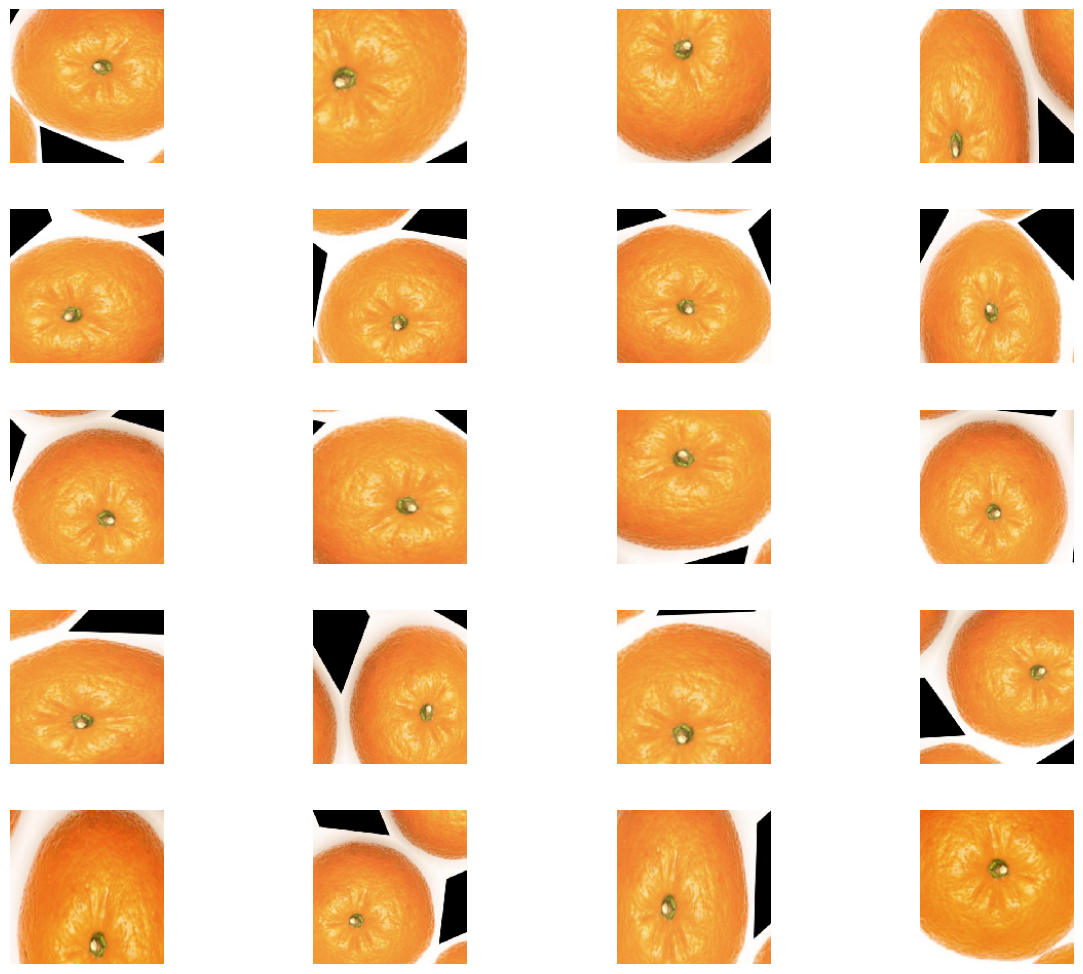

In [35]:
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = Image.open(path_aug)
x_aug = np.array(img_augmentation)
x_aug = np.expand_dims(x_aug, axis=0)
desired_shape = (1, 394, 416, 3)
if np.prod(desired_shape) != np.prod(x_aug.shape):
    print("Error: Incompatible shapes!")
else:
    x_aug = np.reshape(x_aug, desired_shape)

# Code for image augmentation using generator

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=prev_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

# Code for displaying augmented images

preview_img = os.listdir(prev_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot((len(preview_img)//4) + 1, 4, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(os.path.join(prev_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150)))
    plt.axis('off')
plt.show()

# Code for deleting the augmented images

for fn in preview_img:
    os.remove(os.path.join(prev_dir, fn))

###Melihat Actual Shape

In [36]:
print("Actual shape:", x_aug.shape)

Actual shape: (1, 394, 416, 3)


## Image Data Generator

In [37]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(150,150),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(val_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 10369 images belonging to 2 classes.
Found 5099 images belonging to 2 classes.


## Sequential Model (Baseline)

In [ ]:
#if you want to use tranfer learning, skip this cell
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.summary()

## Transfer Learning

In [38]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [39]:
# Load pre-trained VGG16 model without top layer
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze all layers in the pre-trained model
for layer in pre_trained_model.layers:
    layer.trainable = False

# Add custom top layers for your specific task
x = Flatten()(pre_trained_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=pre_trained_model.input, outputs=x)

# Unfreeze the last few layers for fine-tuning
for layer in model.layers[-5:]:
    layer.trainable = True

# Diperbarui
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step


In [40]:
train_len = 0
for foldername in os.listdir('/tmp/fruit_dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit_dataset/train',foldername)))

val_len = 0
for foldername in os.listdir('/tmp/fruit_dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit_dataset/val',foldername)))

print(train_len)
print(val_len)

10369
5099


## Callbacks function

In [41]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('accuracy') >= 0.93:
            print("\nReached 93% accuracy. Training stopped.")
            self.model.stop_training = True

callbacks = myCallback()

## Train model

In [42]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_len // 32,
    epochs=3,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=val_len // 32
)

Epoch 1/3
324/324 [==============================] - 181s 520ms/step - loss: 0.2935 - accuracy: 0.8695 - val_loss: 0.2032 - val_accuracy: 0.9180
Epoch 2/3
324/324 [==============================] - 169s 521ms/step - loss: 0.1825 - accuracy: 0.9275 - val_loss: 0.1599 - val_accuracy: 0.9322
Epoch 3/3
324/324 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9409
Reached 93% accuracy. Training stopped.
324/324 [==============================] - 198s 613ms/step - loss: 0.1491 - accuracy: 0.9409 - val_loss: 0.1610 - val_accuracy: 0.9347


## Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

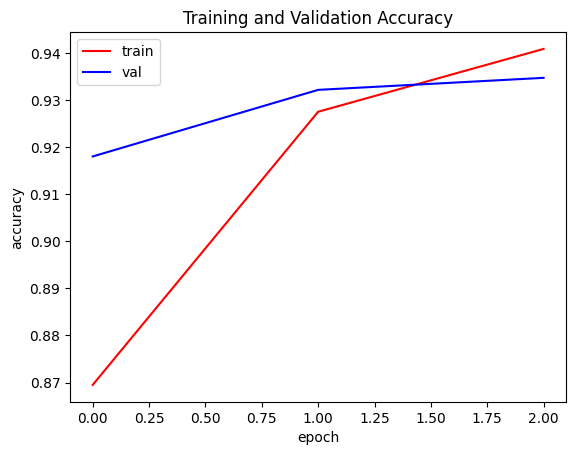

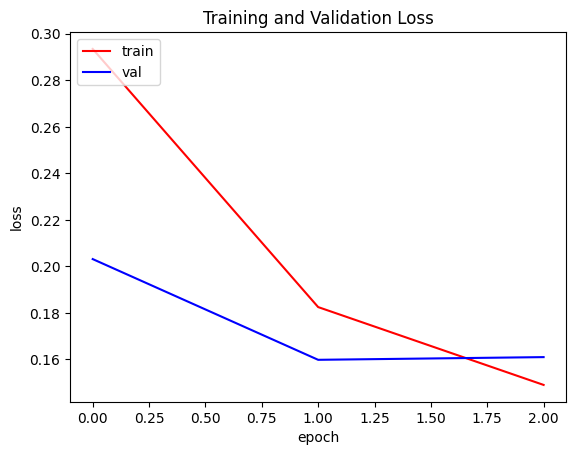

<Figure size 640x480 with 0 Axes>

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.figure()

## Evaluate Model

In [44]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 4004 images belonging to 2 classes.
4004/4004 [==============================] - 45s 11ms/step - loss: 0.1392 - accuracy: 0.9468
accuracy test:  0.9468032121658325
loss test:  0.13924935460090637


In [45]:
# Simpan model dalam format .h5
model.save('Model.h5')

## Predict Image

Saving alpukat.jpeg to alpukat.jpeg
Saving alpukat_busuk.jpeg to alpukat_busuk.jpeg
Saving anggur.jpeg to anggur.jpeg
Saving busuk3.jpeg to busuk3.jpeg
Saving food_9722_1.jpg to food_9722_1.jpg
Saving jambu_biji.jpeg to jambu_biji.jpeg
Saving jambu_biji_busuk.jpeg to jambu_biji_busuk.jpeg
Saving jeruk.png to jeruk.png
Saving jeruk_busuk.jpg to jeruk_busuk.jpg
Saving manfaat_buah_pisang_image_1_1_.jpg to manfaat_buah_pisang_image_1_1_.jpg
Saving pisang_busuk.jpeg to pisang_busuk.jpeg
1/1 [==============================] - 0s 23ms/step


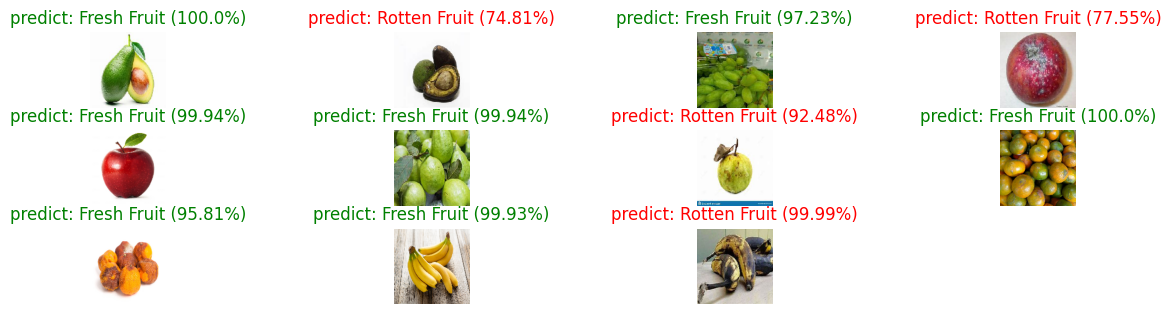

In [47]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('Model.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name))+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, color='green')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

# Convert to model js with tensorflow js

## Install library

In [48]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

## Converter

In [49]:
#Saving to js model (json format)
!mkdir json_model
!tensorflowjs_converter --input_format=keras {"Model.h5"} ./
!mv *.bin *.json json_model/

2023-06-13 14:02:26.237187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Zip Model Json

In [50]:
!zip -r /content/json_model.zip /content/json_model

  adding: content/json_model/ (stored 0%)
  adding: content/json_model/group1-shard15of23.bin (deflated 8%)
  adding: content/json_model/group1-shard2of23.bin (deflated 7%)
  adding: content/json_model/group1-shard16of23.bin (deflated 9%)
  adding: content/json_model/group1-shard8of23.bin (deflated 7%)
  adding: content/json_model/group1-shard23of23.bin (deflated 8%)
  adding: content/json_model/group1-shard18of23.bin (deflated 9%)
  adding: content/json_model/group1-shard4of23.bin (deflated 7%)
  adding: content/json_model/group1-shard5of23.bin (deflated 7%)
  adding: content/json_model/group1-shard7of23.bin (deflated 7%)
  adding: content/json_model/group1-shard1of23.bin (deflated 7%)
  adding: content/json_model/group1-shard13of23.bin (deflated 7%)
  adding: content/json_model/group1-shard11of23.bin (deflated 7%)
  adding: content/json_model/group1-shard14of23.bin (deflated 7%)
  adding: content/json_model/group1-shard10of23.bin (deflated 7%)
  adding: content/json_model/group1-shar